In [1]:
import warnings
warnings.filterwarnings("ignore")

#### Importing the Libraries

In [1]:
#Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
%matplotlib inline
import glob
import PIL
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D

import efficientnet.keras 
from tensorflow.keras.applications.efficientnet import EfficientNetB0

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#### Exploraatory Data Analysis

In [3]:
#Defining a funtion names "sampleimage" to view all types of images
def sampleimage(image_path):
    img = load_img(image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

(885, 1036, 3)


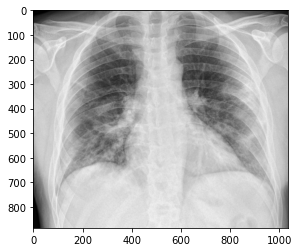

In [4]:
#COVID 19 image 
image_path="E:\\train\\COVID19\\COVID19(110).jpg"
sampleimage(image_path)

(1858, 2090, 3)


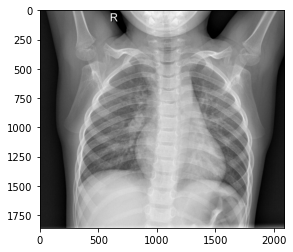

In [5]:
#Normal image 
image_path = "E:\\train\\NORMAL\\IM-0115-0001.jpeg"
sampleimage(image_path)

(439, 712, 3)


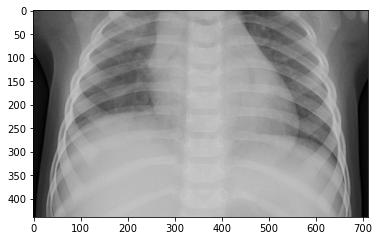

In [6]:
#Pneumonia image
image_path="E:\\train\\PNEUMONIA\\person1_bacteria_1.jpeg"
sampleimage(image_path)

(512, 512, 3)


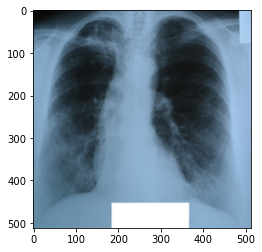

In [7]:
#Turberculosis image
image_path = "E:\\train\\TURBERCULOSIS\\Tuberculosis-1.png"
sampleimage(image_path)

In [8]:
#Loading the paths for the datasets
covid = os.listdir("E:\\train\\COVID19")
normal = os.listdir("E:\\train\\NORMAL")
pneumonia = os.listdir("E:\\train\\PNEUMONIA")
tuber = os.listdir("E:\\train\\TURBERCULOSIS")

Number of  covid images       :  460
Number of  Normal images      :  1341
Number of  Tuberculosis images:  650
Number of  Pneumonia images   :  3875


<AxesSubplot:>

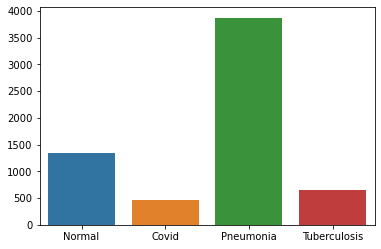

In [65]:
#Number of  images found in each class
print("Number of  covid images       : ", len(covid))
print("Number of  Normal images      : ", len(normal))
print("Number of  Tuberculosis images: ", len(tuber))
print("Number of  Pneumonia images   : ", len(pneumonia))

sns.barplot(x=["Normal","Covid","Pneumonia","Tuberculosis"],y=[len(normal),len(covid),len(pneumonia),len(tuber)])

#### Preprocessing

In [10]:
#Since all the given images are x-rays, the pixcel size of and every image are different, 
# so all the images are converted into 224*224 pixcels

labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

x_train=[]
y_train=[]
# x_test=[]
# y_test=[]

for i in labels:
    folder_path = os.path.join("E:", "train", i)
    print(folder_path)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        x_train.append(img)
        y_train.append(i)

# for i in labels:
#     folder_path = os.path.join("D:", "test", i)
#     print(folder_path)
#     for j in os.listdir(folder_path):
#         img = cv2.imread(os.path.join(folder_path, j))
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         img = cv2.resize(img, (64, 64))
#         x_train.append(img)
#         y_train.append(i)
        
x_train = np.array(x_train)
y_train = np.array(y_train)
# x_test = np.array(x_test)
# y_test = np.array(y_test)

E:train\COVID19
E:train\NORMAL
E:train\PNEUMONIA
E:train\TURBERCULOSIS


In [11]:
#Converting test images into 224*224 pixcels
x_test=[]
y_test=[]

for i in labels:
    folder_path = os.path.join("E:", "test", i)
    print(folder_path)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        x_test.append(img)
        y_test.append(i)
        
x_test = np.array(x_test)
y_test = np.array(y_test)

E:test\COVID19
E:test\NORMAL
E:test\PNEUMONIA
E:test\TURBERCULOSIS


#### Efficient NetB0

In [12]:
x_train.shape

(6326, 224, 224, 3)

In [13]:
#indexing the images 

ytrain = []
for i in y_train:
    ytrain.append(labels.index(i))
ytrain = tf.keras.utils.to_categorical(ytrain)

ytest = []
for i in y_test:
    ytest.append(labels.index(i))
ytest = tf.keras.utils.to_categorical(ytest)

In [14]:
print("Shape of training dataset: ")
print("Input Shape: ",x_train.shape)
print("Output Shape: ",ytrain.shape)

print("\nShape of testing dataset: ")
print("Input Shape: ",x_test.shape)
print("Output Shape: ",ytest.shape)

Shape of training dataset: 
Input Shape:  (6326, 224, 224, 3)
Output Shape:  (6326, 4)

Shape of testing dataset: 
Input Shape:  (771, 224, 224, 3)
Output Shape:  (771, 4)


In [19]:
#Bulding efficientnetB0
efficientnet = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
efficientnet.summary()


Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_2[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

                                                                                                  
 block2a_project_conv (Conv2D)  (None, 56, 56, 24)   2304        ['block2a_se_excite[0][0]']      
                                                                                                  
 block2a_project_bn (BatchNorma  (None, 56, 56, 24)  96          ['block2a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block2b_expand_conv (Conv2D)   (None, 56, 56, 144)  3456        ['block2a_project_bn[0][0]']     
                                                                                                  
 block2b_expand_bn (BatchNormal  (None, 56, 56, 144)  576        ['block2b_expand_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block3b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block3b_expand_activation (Act  (None, 28, 28, 240)  0          ['block3b_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block3b_dwconv (DepthwiseConv2  (None, 28, 28, 240)  6000       ['block3b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block3b_b

 block4b_dwconv (DepthwiseConv2  (None, 14, 14, 480)  4320       ['block4b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block4b_bn (BatchNormalization  (None, 14, 14, 480)  1920       ['block4b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block4b_activation (Activation  (None, 14, 14, 480)  0          ['block4b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4b_se_squeeze (GlobalAver  (None, 480)         0           ['block4b_activation[0][0]']     
 agePoolin

                                                                                                  
 block5a_activation (Activation  (None, 14, 14, 480)  0          ['block5a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block5a_se_squeeze (GlobalAver  (None, 480)         0           ['block5a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block5a_se_reshape (Reshape)   (None, 1, 1, 480)    0           ['block5a_se_squeeze[0][0]']     
                                                                                                  
 block5a_se_reduce (Conv2D)     (None, 1, 1, 20)     9620        ['block5a_se_reshape[0][0]']     
          

                                                                                                  
 block5c_se_expand (Conv2D)     (None, 1, 1, 672)    19488       ['block5c_se_reduce[0][0]']      
                                                                                                  
 block5c_se_excite (Multiply)   (None, 14, 14, 672)  0           ['block5c_activation[0][0]',     
                                                                  'block5c_se_expand[0][0]']      
                                                                                                  
 block5c_project_conv (Conv2D)  (None, 14, 14, 112)  75264       ['block5c_se_excite[0][0]']      
                                                                                                  
 block5c_project_bn (BatchNorma  (None, 14, 14, 112)  448        ['block5c_project_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 block6b_project_bn (BatchNorma  (None, 7, 7, 192)   768         ['block6b_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block6b_drop (Dropout)         (None, 7, 7, 192)    0           ['block6b_project_bn[0][0]']     
                                                                                                  
 block6b_add (Add)              (None, 7, 7, 192)    0           ['block6b_drop[0][0]',           
                                                                  'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6b_add[0][0]']            
          

                                                                                                  
 block6d_add (Add)              (None, 7, 7, 192)    0           ['block6d_drop[0][0]',           
                                                                  'block6c_add[0][0]']            
                                                                                                  
 block7a_expand_conv (Conv2D)   (None, 7, 7, 1152)   221184      ['block6d_add[0][0]']            
                                                                                                  
 block7a_expand_bn (BatchNormal  (None, 7, 7, 1152)  4608        ['block7a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block7a_expand_activation (Act  (None, 7, 7, 1152)  0           ['block7a_expand_bn[0][0]']      
 ivation) 

In [20]:
from glob import glob
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint

In [21]:
#Bulding  the cnn layer
model = efficientnet.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
model = tf.keras.layers.Dense(4, activation='softmax')(model)
model = tf.keras.models.Model(inputs=efficientnet.input, outputs=model)

In [22]:
# Compiling the model
model.compile(optimizer = tensorflow.keras.optimizers.Adam(0.001), 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [23]:
tensorboard = TensorBoard(log_dir = 'logs') 
checkpoint = ModelCheckpoint("CovidModelEfficientNet.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             mode="auto",
                             verbose=1) 
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, min_delta = 0.001, mode='auto',verbose=1)


In [24]:
#Training the model
hist = model.fit(x_train, 
                ytrain, 
                validation_split=0.1,
                epochs=5, 
                verbose=1, 
                batch_size=32, 
                callbacks=[tensorboard, checkpoint, reduce_lr])

Epoch 1/5
178/178 [==============================] - ETA: 0s - loss: 0.1630 - accuracy: 0.9455
Epoch 1: val_accuracy improved from -inf to 0.26698, saving model to CovidModelEfficientNet.h5
178/178 [==============================] - 1810s 10s/step - loss: 0.1630 - accuracy: 0.9455 - val_loss: 3.8429 - val_accuracy: 0.2670 - lr: 0.0010
Epoch 2/5
178/178 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9802 
Epoch 2: val_accuracy did not improve from 0.26698
178/178 [==============================] - 2003s 11s/step - loss: 0.0597 - accuracy: 0.9802 - val_loss: 4.0997 - val_accuracy: 0.2417 - lr: 0.0010
Epoch 3/5
178/178 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9900 
Epoch 3: val_accuracy did not improve from 0.26698

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
178/178 [==============================] - 1913s 11s/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 4.9515 - val_accuracy: 0.0490 - lr: 0.001

In [25]:
#Accuracy for trained model
results = model.evaluate(x_train, ytrain)

198/198 [==============================] - 469s 2s/step - loss: 3.2064 - accuracy: 0.9295


In [26]:
#accuracy for tested dataset
results = model.evaluate(x_test,ytest)

25/25 [==============================] - 58s 2s/step - loss: 3.7714 - accuracy: 0.7380


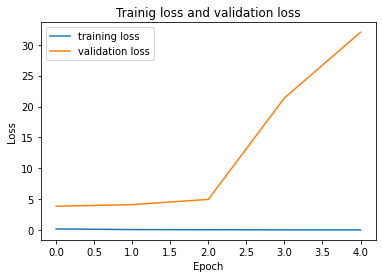

In [31]:
#Training loss and validation loss
plt.plot(hist.history['loss'], label="training loss")
plt.plot(hist.history['val_loss'], label='validation loss')
plt.title("Trainig loss and validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

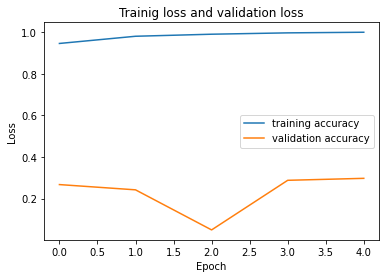

In [32]:
#Training accuracy and validation accuracy
plt.plot(hist.history['accuracy'], label="training accuracy")
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.title("Trainig loss and validation loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

25/25 [==============================] - 55s 2s/step
[[105   0   0   1]
 [  1  70 163   0]
 [  0   1 389   0]
 [ 34   0   2   5]]


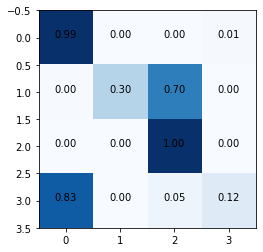

In [61]:
#Confusion matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(x_test)

cm = confusion_matrix(ytest.argmax(axis=1), pred.argmax(axis=1))
print(cm)
cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]

for i in range(cm.shape[0]):
    for j in range(cm.shape[0]):
        plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment='center', color='black')

plt.imshow(cm, cmap=plt.cm.Blues)

In [54]:
#Classification report
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
y_test_new = np.argmax(ytest, axis=1)

print(classification_report(y_test_new, pred))

25/25 [==============================] - 51s 2s/step
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       106
           1       0.99      0.30      0.46       234
           2       0.70      1.00      0.82       390
           3       0.83      0.12      0.21        41

    accuracy                           0.74       771
   macro avg       0.82      0.60      0.59       771
weighted avg       0.80      0.74      0.68       771



In [63]:
#F1_score
print("F1 Score: ", f1_score(ytest.argmax(axis=1), pred.argmax(axis=1), average='macro'))

F1 Score:  0.5873983574619196
